# USER REVIEW CATEGORISATION USING MACHINE LEARNING

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Data Collection and Data Warehousing

In [2]:
data=pd.read_csv("Dataset.csv")
data.head()

,Review Id,Feature 1:Picture Quality,Feature 2:Sound Quality,Feature 3:Connectivity,Feature 4:Price
0,1,Highly Satisfactory,Nice,Good,Worth it
1,2,Moderate,Medium,Average,Satisfactory
2,3,Unsatisfactory,Poor,Inadequate,Futile
3,4,Moderate,Medium,Good,Satisfactory
4,5,Highly Satisfactory,Nice,Good,Worth it


### Data Cleaning

In [3]:
df=data.iloc[:,1:]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Feature 1:Picture Quality  200 non-null    object
 1   Feature 2:Sound Quality    200 non-null    object
 2   Feature 3:Connectivity     200 non-null    object
 3   Feature 4:Price            200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [4]:
df["Feature 1:Picture Quality"].value_counts()

Highly Satisfactory    130
Moderate                43
Unsatisfactory          27
Name: Feature 1:Picture Quality, dtype: int64

In [5]:
df["Feature 2:Sound Quality"].value_counts()

Nice      97
Medium    71
Poor      32
Name: Feature 2:Sound Quality, dtype: int64

In [6]:
df["Feature 3:Connectivity"].value_counts()

Good          103
Average        67
Inadequate     30
Name: Feature 3:Connectivity, dtype: int64

In [7]:
df["Feature 4:Price"].value_counts()

Satisfactory    80
Worth It        50
Worth it        40
Futile          15
Nonsensical     15
Name: Feature 4:Price, dtype: int64

In [8]:
df.replace(['Futile','Worth it'], value=['Nonsensical','Worth It'],inplace=True)
df["Feature 4:Price"].value_counts()

Worth It        90
Satisfactory    80
Nonsensical     30
Name: Feature 4:Price, dtype: int64

In [9]:
f1a=df[df["Feature 1:Picture Quality"]=="Highly Satisfactory"].shape[0]
f1b=df[df["Feature 1:Picture Quality"]=="Moderate"].shape[0]
f1c=df[df["Feature 1:Picture Quality"]=="Unsatisfactory"].shape[0]

f2a=df[df["Feature 2:Sound Quality"]=="Nice"].shape[0]
f2b=df[df["Feature 2:Sound Quality"]=="Medium"].shape[0]
f2c=df[df["Feature 2:Sound Quality"]=="Poor"].shape[0]

f3a=df[df["Feature 3:Connectivity"]=="Good"].shape[0]
f3b=df[df["Feature 3:Connectivity"]=="Average"].shape[0]
f3c=df[df["Feature 3:Connectivity"]=="Inadequate"].shape[0]

f4a=df[df["Feature 4:Price"]=="Worth It"].shape[0]
f4b=df[df["Feature 4:Price"]=="Satisfactory"].shape[0]
f4c=df[df["Feature 4:Price"]=="Futile"].shape[0]



Text(0.5, 1.0, 'Feature 4:Price')

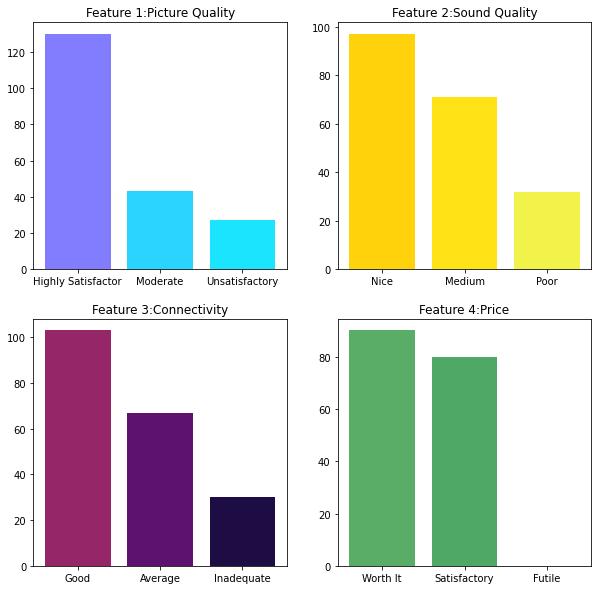

In [10]:
fig=plt.figure(figsize=(10,10))
axs = fig.subplots(2, 2)

my_cmap1 = plt.get_cmap("cool")
my_cmap2 = plt.get_cmap("Wistia")
my_cmap3 = plt.get_cmap("inferno")
my_cmap4 = plt.get_cmap("summer")


axs[0, 0].bar(["Highly Satisfactor","Moderate","Unsatisfactory"], [f1a,f1b,f1c],color=my_cmap1([f1a,f1b,f1c]))
axs[0, 0].set_title('Feature 1:Picture Quality')
axs[0, 1].bar(["Nice","Medium","Poor"], [f2a,f2b,f2c],color=my_cmap2([f2a,f2b,f2c]))
axs[0, 1].set_title('Feature 2:Sound Quality')
axs[1, 0].bar(["Good","Average","Inadequate"], [f3a,f3b,f3c],color=my_cmap3([f3a,f3b,f3c]))
axs[1, 0].set_title('Feature 3:Connectivity')
axs[1, 1].bar(["Worth It","Satisfactory","Futile"], [f4a,f4b,f4c],color=my_cmap4([f4a,f4b,f4c]))
axs[1, 1].set_title('Feature 4:Price')


### Data Transformation

In [11]:
df.replace(["Highly Satisfactory","Moderate","Unsatisfactory"],[3,2,1],inplace=True)
df.replace(["Nice","Medium","Poor"],[3,2,1],inplace=True)
df.replace(["Good","Average","Inadequate"],[3,2,1],inplace=True)
df.replace(["Worth It","Satisfactory","Nonsensical"],[3,2,1],inplace=True)

In [12]:
df

,Feature 1:Picture Quality,Feature 2:Sound Quality,Feature 3:Connectivity,Feature 4:Price
0,3,3,3,3
1,2,2,2,2
2,1,1,1,1
3,2,2,3,2
4,3,3,3,3
...,...,...,...,...
195,3,3,3,3
196,3,3,3,3
197,1,1,1,1
198,3,3,3,2


### Training Dataset with KMeans

In [13]:
from sklearn.cluster import KMeans

wcss=[]

for i in range(1,20):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit_predict(df)
    wcss.append(kmeans.inertia_)

D:\Softwares\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [14]:
wcss

[420.18499999999995,
 207.50145701796987,
 170.96915516688063,
 133.50892591068242,
 112.4510196779964,
 93.98291678710797,
 83.79398057655663,
 74.64289582966052,
 64.54347899529388,
 56.5308561404861,
 48.276593329906355,
 44.85818383449457,
 40.37970351372054,
 36.59027749855924,
 35.18732305276423,
 31.34755538579068,
 27.893280494015784,
 26.884550335285628,
 24.425147646471174]

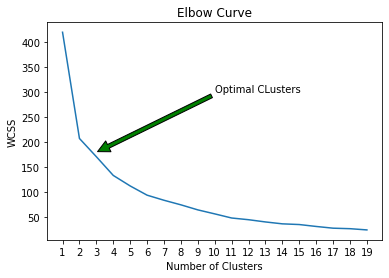

In [15]:
fig1,plt1=plt.subplots()
p=plt1.plot(range(1,20),wcss)
plt1.set_xlabel("Number of Clusters")
plt1.set_ylabel("WCSS")
plt1.set_xticks(range(1,20))
plt1.annotate('Optimal CLusters', xy=(3, 180.02444444444453), xytext=(10, 300), arrowprops=dict(facecolor='green',shrink=0.01))
plt1.set_title("Elbow Curve")
plt.show()

In [16]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df)
p=kmeans.labels_
pd.DataFrame(p).value_counts()

0    89
1    58
2    53
dtype: int64

In [17]:
print(kmeans.cluster_centers_)

[[2.91011236 2.66292135 2.6741573  3.        ]
 [1.5862069  1.51724138 1.62068966 1.56896552]
 [2.86792453 2.64150943 2.66037736 1.9245283 ]]


In [18]:
df["cluster"]=kmeans.labels_
df

,Feature 1:Picture Quality,Feature 2:Sound Quality,Feature 3:Connectivity,Feature 4:Price,cluster
0,3,3,3,3,0
1,2,2,2,2,1
2,1,1,1,1,1
3,2,2,3,2,2
4,3,3,3,3,0
...,...,...,...,...,...
195,3,3,3,3,0
196,3,3,3,3,0
197,1,1,1,1,1
198,3,3,3,2,2


C:\Users\user\AppData\Local\Temp\ipykernel_12800\2647858421.py:37: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  cb1=fig.colorbar(img)


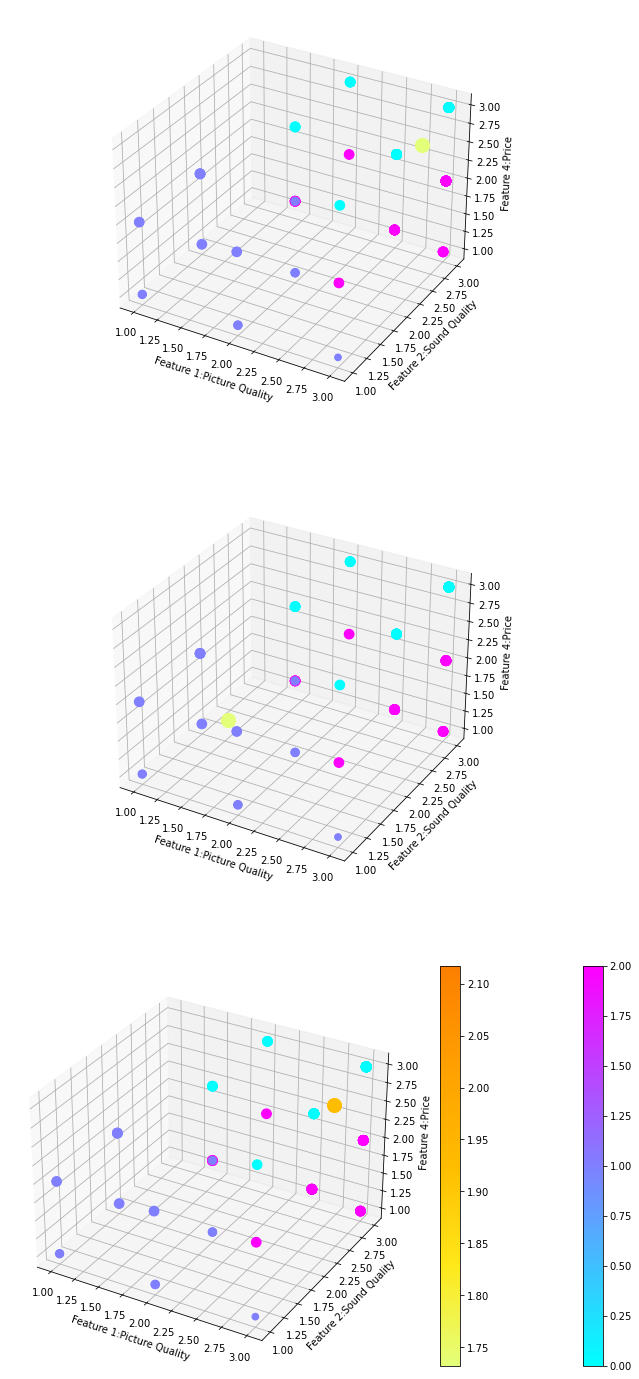

In [19]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(figsize=(15,25))
ax1 = fig.add_subplot(311, projection='3d')
ax2 = fig.add_subplot(312, projection='3d')
ax3 = fig.add_subplot(313, projection='3d')


x = df["Feature 1:Picture Quality"]
y = df["Feature 2:Sound Quality"]
z = df["Feature 4:Price"]
c = kmeans.labels_
d= df["Feature 3:Connectivity"]


img = ax1.scatter(x, y, z, c=c,s=d*25+20, alpha=1, cmap=plt.cm.cool, picker=True )

centroid=ax1.scatter(kmeans.cluster_centers_[0,0],kmeans.cluster_centers_[0,1],kmeans.cluster_centers_[0,2],c=kmeans.cluster_centers_[0,3],alpha=1,s=200, cmap=plt.cm.Wistia, picker=True)

img1 = ax2.scatter(x, y, z, c=c,s=d*25+20, alpha=1, cmap=plt.cm.cool, picker=True)
centroid=ax2.scatter(kmeans.cluster_centers_[1,0],kmeans.cluster_centers_[1,1],kmeans.cluster_centers_[1,2],c=kmeans.cluster_centers_[1,3],alpha=1,s=200, cmap=plt.cm.Wistia, picker=True)

img2 = ax3.scatter(x, y, z, c=c,s=d*25+20, alpha=1, cmap=plt.cm.cool, picker=True)
centroid=ax3.scatter(kmeans.cluster_centers_[2,0],kmeans.cluster_centers_[2,1],kmeans.cluster_centers_[2,2],c=kmeans.cluster_centers_[2,3],alpha=1,s=200, cmap=plt.cm.Wistia, picker=True)

ax1.set_xlabel("Feature 1:Picture Quality")
ax1.set_ylabel("Feature 2:Sound Quality")
ax1.set_zlabel("Feature 4:Price")

ax2.set_xlabel("Feature 1:Picture Quality")
ax2.set_ylabel("Feature 2:Sound Quality")
ax2.set_zlabel("Feature 4:Price")

ax3.set_xlabel("Feature 1:Picture Quality")
ax3.set_ylabel("Feature 2:Sound Quality")
ax3.set_zlabel("Feature 4:Price")

cb1=fig.colorbar(img)
cb2=fig.colorbar(centroid)


plt.show()


    x axis : Feature 1:Picture Quality
    Y axis : Feature 2:Sound Quality
    z axis : Feature 4:Price
    Size of the Data points : Feature 3:Connectivity

In [20]:
df0=df[df["cluster"]==0]
df1=df[df["cluster"]==1]
df2=df[df["cluster"]==2]

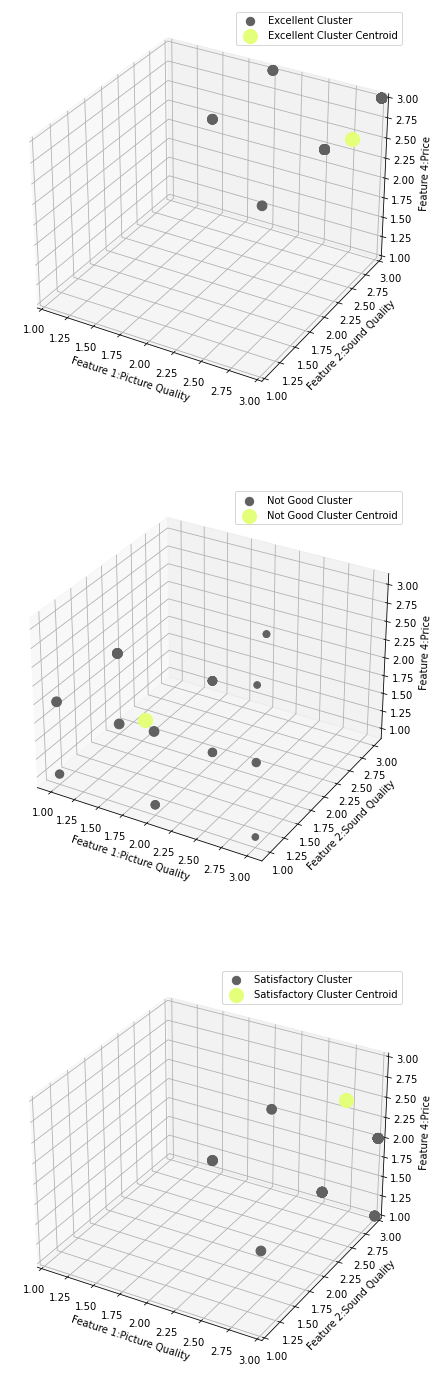

In [21]:
bfig=plt.figure(figsize=(15,25))
abx0 = bfig.add_subplot(311, projection='3d')
abx1 = bfig.add_subplot(312, projection='3d')
abx2 = bfig.add_subplot(313, projection='3d')


bx0,bx1,bx2 = df0["Feature 1:Picture Quality"],df1["Feature 1:Picture Quality"],df2["Feature 1:Picture Quality"]
by0,by1,by2 = df0["Feature 2:Sound Quality"],df1["Feature 2:Sound Quality"],df2["Feature 2:Sound Quality"]
bz0,bz1,bz2 = df0["Feature 4:Price"],df1["Feature 4:Price"],df2["Feature 4:Price"]
bd0,bd1,bd2 = df0["Feature 3:Connectivity"],df1["Feature 3:Connectivity"],df2["Feature 3:Connectivity"]
 
bimg1 = abx0.scatter(bx0, by0, bz0, c="#616161",s=bd0*25+20, alpha=1, label="Excellent Cluster")
abx0.set_xlim(1,3)
abx0.set_ylim(1,3)
abx0.set_zlim(1,3)


centroid=abx0.scatter(kmeans.cluster_centers_[0,0],kmeans.cluster_centers_[0,1],kmeans.cluster_centers_[0,2],c=kmeans.cluster_centers_[0,3],alpha=1,s=200, cmap=plt.cm.Wistia, picker=True, label="Excellent Cluster Centroid")

bimg2 = abx1.scatter(bx1, by1, bz1, c="#616161",s=bd1*25+20, alpha=1,label="Not Good Cluster")
centroid=abx1.scatter(kmeans.cluster_centers_[1,0],kmeans.cluster_centers_[1,1],kmeans.cluster_centers_[1,2],c=kmeans.cluster_centers_[1,3],alpha=1,s=200, cmap=plt.cm.Wistia, picker=True,label="Not Good Cluster Centroid")

bimg3 = abx2.scatter(bx2, by2, bz2, c="#616161",s=bd2*25+20, alpha=1, label="Satisfactory Cluster")
centroid=abx2.scatter(kmeans.cluster_centers_[2,0],kmeans.cluster_centers_[2,1],kmeans.cluster_centers_[2,2],c=kmeans.cluster_centers_[2,3],alpha=1,s=200, cmap=plt.cm.Wistia, picker=True, label="Satisfactory Cluster Centroid")
abx2.set_xlim(1,3)
abx2.set_ylim(1,3)
abx2.set_zlim(1,3)

abx0.set_xlabel("Feature 1:Picture Quality")
abx0.set_ylabel("Feature 2:Sound Quality")
abx0.set_zlabel("Feature 4:Price")

abx1.set_xlabel("Feature 1:Picture Quality")
abx1.set_ylabel("Feature 2:Sound Quality")
abx1.set_zlabel("Feature 4:Price")

abx2.set_xlabel("Feature 1:Picture Quality")
abx2.set_ylabel("Feature 2:Sound Quality")
abx2.set_zlabel("Feature 4:Price")

abx0.legend()
abx1.legend()
abx2.legend()

plt.show()

    x axis : Feature 1:Picture Quality
    Y axis : Feature 2:Sound Quality
    z axis : Feature 4:Price
    Size of the Data points : Feature 3:Connectivity

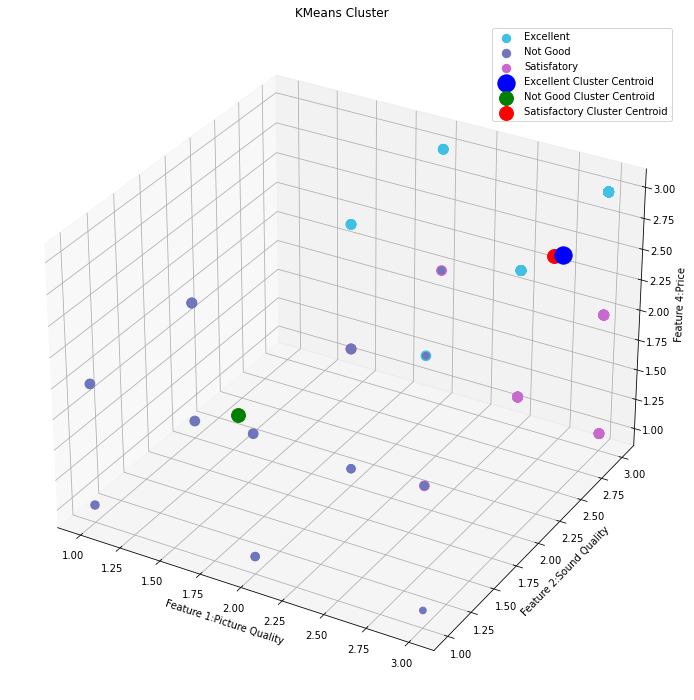

In [22]:
bfig=plt.figure(figsize=(12,20))
abx0 = bfig.add_subplot(111, projection='3d')

bimg1 = abx0.scatter(bx0, by0, bz0, c="#40C0E4",s=bd0*25+20, alpha=1, label="Excellent")
bimg2 = abx0.scatter(bx1, by1, bz1, c="#7076BB",s=bd1*25+20, alpha=1, label="Not Good" )
bimg3 = abx0.scatter(bx2, by2, bz2, c="#C968CF",s=bd2*25+20, alpha=1, label="Satisfatory")

centroid=abx0.scatter(kmeans.cluster_centers_[0,0],kmeans.cluster_centers_[0,1],kmeans.cluster_centers_[0,2],c="blue",alpha=1,s=kmeans.cluster_centers_[0,3]*100, label="Excellent Cluster Centroid")
centroid=abx0.scatter(kmeans.cluster_centers_[1,0],kmeans.cluster_centers_[1,1],kmeans.cluster_centers_[1,2],c="green",alpha=1,s=kmeans.cluster_centers_[2,3]*100, label="Not Good Cluster Centroid")
centroid=abx0.scatter(kmeans.cluster_centers_[2,0],kmeans.cluster_centers_[2,1],kmeans.cluster_centers_[2,2],c="red",alpha=1,s=kmeans.cluster_centers_[2,3]*100, label="Satisfactory Cluster Centroid")


abx0.set_xlabel("Feature 1:Picture Quality")
abx0.set_ylabel("Feature 2:Sound Quality")
abx0.set_zlabel("Feature 4:Price")
abx0.legend()
plt.title("KMeans Cluster")
plt.show()

    x axis : Feature 1:Picture Quality
    Y axis : Feature 2:Sound Quality
    z axis : Feature 4:Price
    Size of the Data points : Feature 3:Connectivity

In [23]:
print("Excellent : ", len(df0)/len(df)*100,"%")
print("Satisfactory : ", len(df2)/len(df)*100,"%")
print("Not Good : ", round(len(df1)/len(df)*100,2),"%")

Excellent :  44.5 %
Satisfactory :  26.5 %
Not Good :  29.0 %


### Training the Dataset using EM-Clustering

In [24]:
df.drop(columns="cluster", inplace=True)
df

,Feature 1:Picture Quality,Feature 2:Sound Quality,Feature 3:Connectivity,Feature 4:Price
0,3,3,3,3
1,2,2,2,2
2,1,1,1,1
3,2,2,3,2
4,3,3,3,3
...,...,...,...,...
195,3,3,3,3
196,3,3,3,3
197,1,1,1,1
198,3,3,3,2


In [25]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=3, random_state=0).fit(df)
df["cluster"]=gm.predict(df)
df

,Feature 1:Picture Quality,Feature 2:Sound Quality,Feature 3:Connectivity,Feature 4:Price,cluster
0,3,3,3,3,0
1,2,2,2,2,1
2,1,1,1,1,2
3,2,2,3,2,1
4,3,3,3,3,0
...,...,...,...,...,...
195,3,3,3,3,0
196,3,3,3,3,0
197,1,1,1,1,2
198,3,3,3,2,0


In [26]:
df0=df[df["cluster"]==0]
df1=df[df["cluster"]==1]
df2=df[df["cluster"]==2]

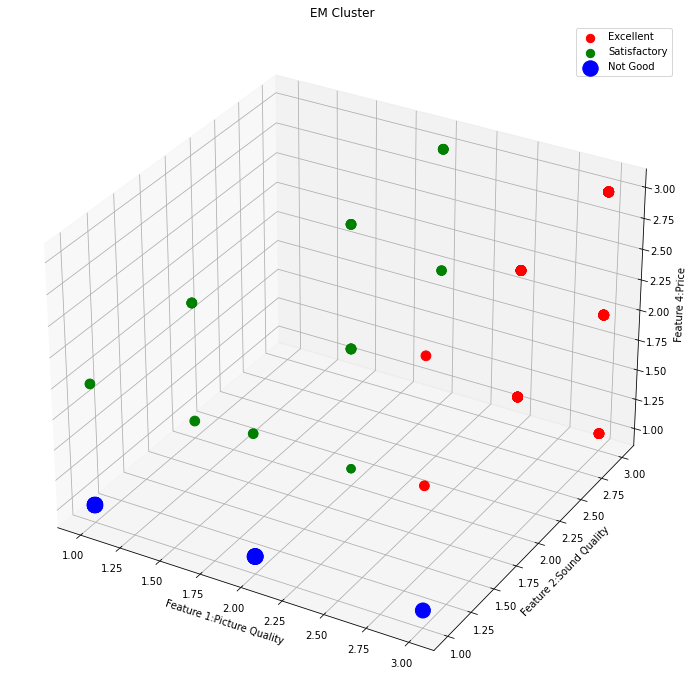

In [27]:
bfig=plt.figure(figsize=(12,20))
abx0 = bfig.add_subplot(111, projection='3d')


bx0,bx1,bx2 = df0["Feature 1:Picture Quality"],df1["Feature 1:Picture Quality"],df2["Feature 1:Picture Quality"]
by0,by1,by2 = df0["Feature 2:Sound Quality"],df1["Feature 2:Sound Quality"],df2["Feature 2:Sound Quality"]
bz0,bz1,bz2 = df0["Feature 4:Price"],df1["Feature 4:Price"],df2["Feature 4:Price"]
bd0,bd1,bd2 = df0["Feature 3:Connectivity"],df1["Feature 3:Connectivity"],df2["Feature 3:Connectivity"]

bimg1 = abx0.scatter(bx0, by0, bz0, c="red",s=bd0*25+20, alpha=1, label="Excellent")
bimg2 = abx0.scatter(bx1, by1, bz1, c="green",s=bd1*25+20, alpha=1, label="Satisfactory" )
bimg3 = abx0.scatter(bx2, by2, bz2, c="blue",s=bd2*25+200, alpha=1, label="Not Good")


abx0.set_xlabel("Feature 1:Picture Quality")
abx0.set_ylabel("Feature 2:Sound Quality")
abx0.set_zlabel("Feature 4:Price")
abx0.legend()
plt.title("EM Cluster")
plt.show()

    x axis : Feature 1:Picture Quality
    Y axis : Feature 2:Sound Quality
    z axis : Feature 4:Price
    Size of the Data points : Feature 3:Connectivity

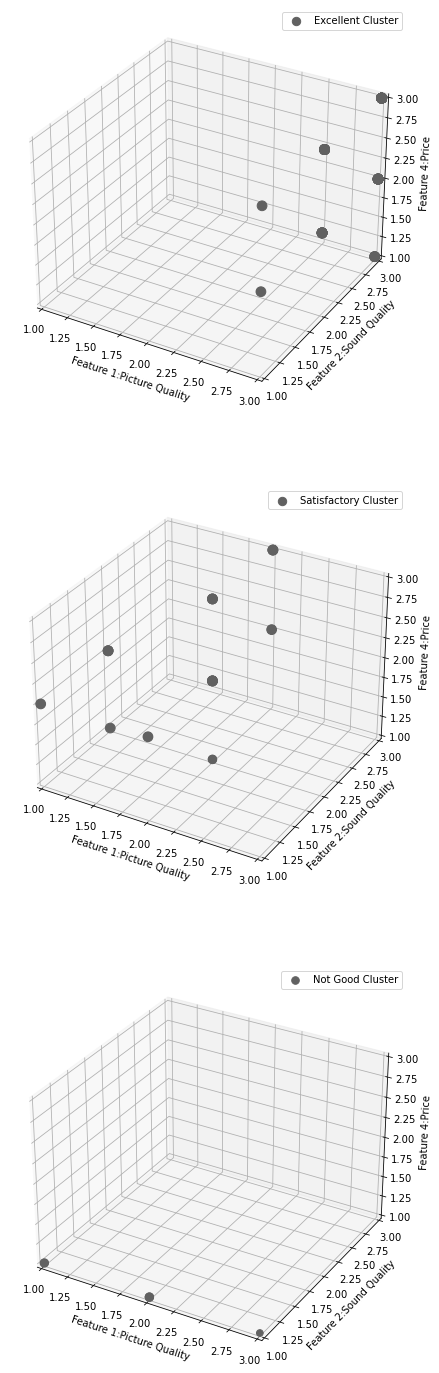

In [28]:
bfig=plt.figure(figsize=(15,25))
abx0 = bfig.add_subplot(311, projection='3d')
abx1 = bfig.add_subplot(312, projection='3d')
abx2 = bfig.add_subplot(313, projection='3d')

 
bimg1 = abx0.scatter(bx0, by0, bz0, c="#616161",s=bd0*25+20, alpha=1, label="Excellent Cluster")
abx0.set_xlim(1,3)
abx0.set_ylim(1,3)
abx0.set_zlim(1,3)


bimg2 = abx1.scatter(bx1, by1, bz1, c="#616161",s=bd1*25+20, alpha=1,label="Satisfactory Cluster")

abx1.set_xlim(1,3)
abx1.set_ylim(1,3)
abx1.set_zlim(1,3)


bimg3 = abx2.scatter(bx2, by2, bz2, c="#616161",s=bd2*25+20, alpha=1, label="Not Good Cluster")
abx2.set_xlim(1,3)
abx2.set_ylim(1,3)
abx2.set_zlim(1,3)

abx0.set_xlabel("Feature 1:Picture Quality")
abx0.set_ylabel("Feature 2:Sound Quality")
abx0.set_zlabel("Feature 4:Price")

abx1.set_xlabel("Feature 1:Picture Quality")
abx1.set_ylabel("Feature 2:Sound Quality")
abx1.set_zlabel("Feature 4:Price")

abx2.set_xlabel("Feature 1:Picture Quality")
abx2.set_ylabel("Feature 2:Sound Quality")
abx2.set_zlabel("Feature 4:Price")

abx0.legend()
abx1.legend()
abx2.legend()

plt.show()

    x axis : Feature 1:Picture Quality
    Y axis : Feature 2:Sound Quality
    z axis : Feature 4:Price
    Size of the Data points : Feature 3:Connectivity

In [29]:
print("Excellent : ", len(df0)/len(df)*100,"%")
print("Satisfactory : ", len(df1)/len(df)*100,"%")
print("Not Good : ", round(len(df2)/len(df)*100,2),"%")

Excellent :  64.5 %
Satisfactory :  25.0 %
Not Good :  10.5 %
